# Lab 3: Visualizations
Lets start by very briefly reviewing two of the most important visualization libraries in Python, including matplotlib and seaborn:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import norm
import pickle

In [2]:
# data = {'tips': sns.load_dataset('tips'),
#         'iris': sns.load_dataset('iris'),
#         'mpg': sns.load_dataset('mpg')}
#
#
# with open("data.pkl", "wb") as f:
#     pickle.dump(data, f)

with open("data.pkl", "rb") as f:
    data = pickle.load(f)

mpg, tips, iris = data['mpg'], data['tips'], data['iris']

## Matplotlib
Matplotlib is a data visualization library in Python that provides a wide range of options for **creating static**, animated, and interactive visualizations. It is a low-level library that provides granular control over every aspect of a plot. Matplotlib can create many different types of plots, including line plots, scatter plots, bar plots, histograms, and more.

Here's an example of how to create a simple line plot using Matplotlib:
In this example, we create an array of x values using numpy.linspace, and an array of y values using numpy.sin. We then create a plot using plt.subplots and ax.plot, and add labels and a title using ax.set_xlabel, ax.set_ylabel, and ax.set_title.

Text(0.5, 1.0, 'Sine Wave')

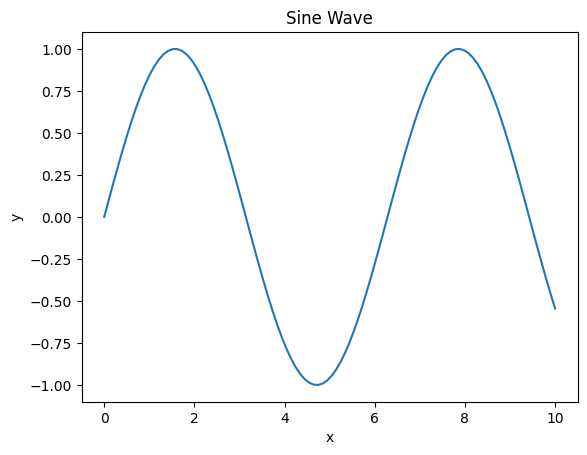

In [3]:
# Create some data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create a plot
fig, ax = plt.subplots()
ax.plot(x, y)

# Add labels and a title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Sine Wave')

## Seaborn
Seaborn is a data visualization library in Python that is based on Matplotlib. It provides a higher-level interface for creating statistical graphics. Seaborn can create many different types of plots, including scatter plots, line plots, bar plots, histograms, and more. It also provides built-in support for categorical and time-series data. It provides a neater interface with a lot of built-in statistical functions, configurable but pre-implemented plots. The downside is a slight lack in flexibility and customizability. However, it works nicely with matplotlib, so you can always use matplotlib to customize your plots further.

Seaborn, albeit not dependent on pandas, plays nicely with pandas DataFrames.

Here's an example of how to create a simple scatter plot using Seaborn:
In this example, we load the iris dataset using sns.load_dataset. We then create a scatter plot using sns.scatterplot and specify the x and y variables, as well as the data parameter to specify the dataset.


<Axes: xlabel='sepal_length', ylabel='petal_length'>

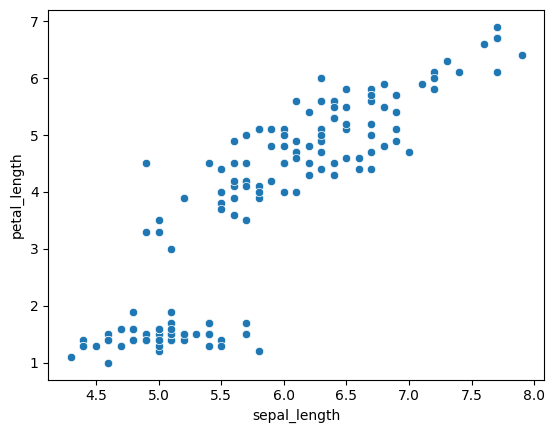

In [4]:
# Create a scatter plot
sns.scatterplot(x='sepal_length', y='petal_length', data=iris)


### Benefits of Seaborn (by example)

1. **Built-in statistical functions**
Seaborn comes with a lot of build-in statistical plots for many usecasees with a descent default values. For a more comprehensive list start looking in the [seaborn documentation](https://seaborn.pydata.org/tutorial/function_overview.html) or in the [seaborn gallary](https://seaborn.pydata.org/examples/index.html). One of the built-in statistical functions in Seaborn is the lmplot() function, which allows you to fit and visualize a linear regression model between two variables with beautiful defaults. Here's an example using the `tips` dataset:

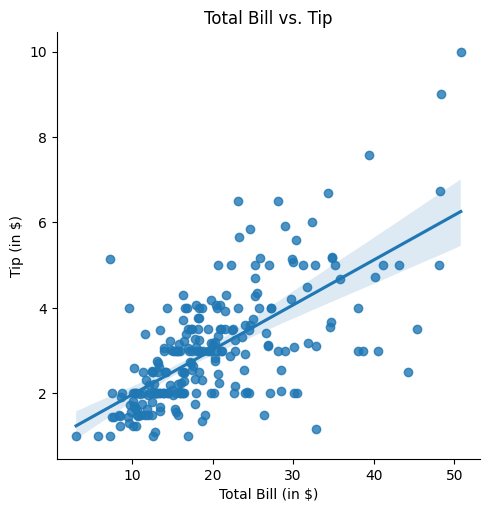

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x="total_bill", y="tip", data=tips)
plt.title("Total Bill vs. Tip")  # NOTICE, that we are using matplotlib here!
plt.xlabel("Total Bill (in $)")
plt.ylabel("Tip (in $)")
plt.show()


2. **Color palettes**
Seaborn provides many built-in color palettes that can be used to customize the color of your plot elements. Here's an example using the color_palette() function:

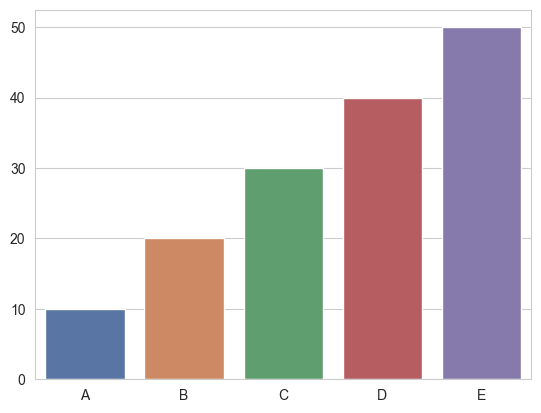

In [6]:
sns.set_style("whitegrid")  # you can actually play with the default styles of seaborn ticks

# Create a color palette
# Arguments from the documentation of sns.color_palette
# Name of a seaborn palette (deep, muted, bright, pastel, dark, colorblind)
# Name of matplotlib colormap # for more details check out: https://matplotlib.org/stable/tutorials/colors/colormaps.html#overview
my_palette = sns.color_palette("deep", 5)

# Plot a bar chart using the custom color palette
sns.barplot(x=["A", "B", "C", "D", "E"], y=[10, 20, 30, 40, 50], palette=my_palette)

plt.show()


3. **Faceting**
Faceting in Seaborn allows you to create small multiples of a plot based on different subsets of your data. Here's an example using the FacetGrid() function:

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4 

Unique values of the time column: ['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner'] 



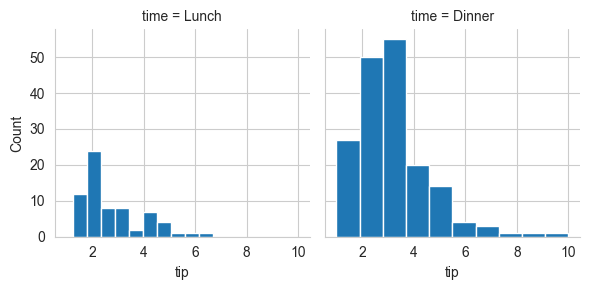

In [7]:
print(tips.head(), '\n')
print(f'Unique values of the time column: {tips["time"].unique()} \n')

# Create a FacetGrid with two facets
g = sns.FacetGrid(tips, col="time")

g.set_ylabels("Count")

# Map a histogram of tip amounts to each facet
g.map(plt.hist, "tip")

plt.show()


4. **pandas integration**

<Axes: xlabel='total_bill', ylabel='tip'>

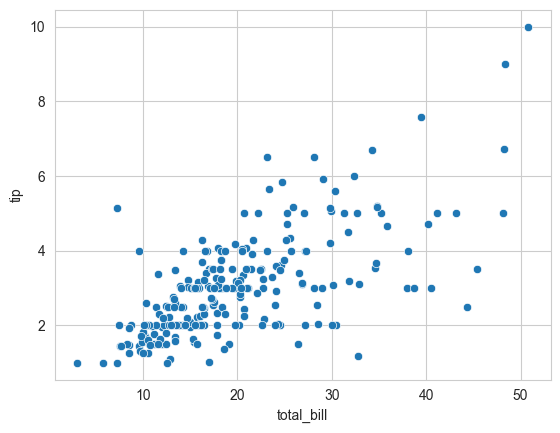

In [8]:
# Plot the relationship between total bill and tip
sns.scatterplot(x="total_bill", y="tip", data=tips)


### The same with Matplotlib
Matplotlib is the "backend" to seaborn, so we would expect, that we can build similar stuff using matplotlib.

2. **Color palettes**
Matplotlib provides a few built-in color palettes that can be accessed using the colormap argument in many plotting functions. Here's an example:

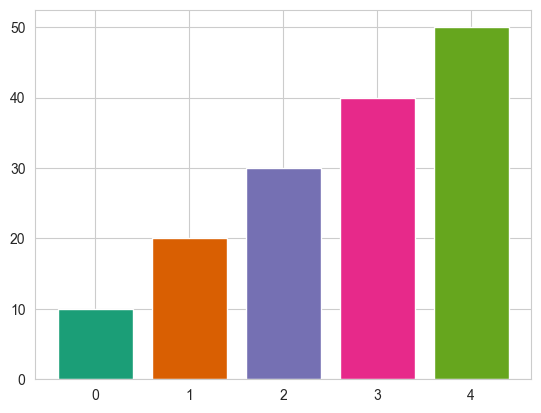

In [9]:
# Generate some random data
x = np.arange(5)
y = np.array([10, 20, 30, 40, 50])

# Create a colormap
colors = plt.cm.Dark2(np.arange(5))

# Plot a bar chart using the custom color palette
plt.bar(x, y, color=colors)
plt.show()

3. **Faceting**
Faceting in Matplotlib can be achieved by manually creating multiple subplots and plotting different subsets of your data on each one. Here's an example:

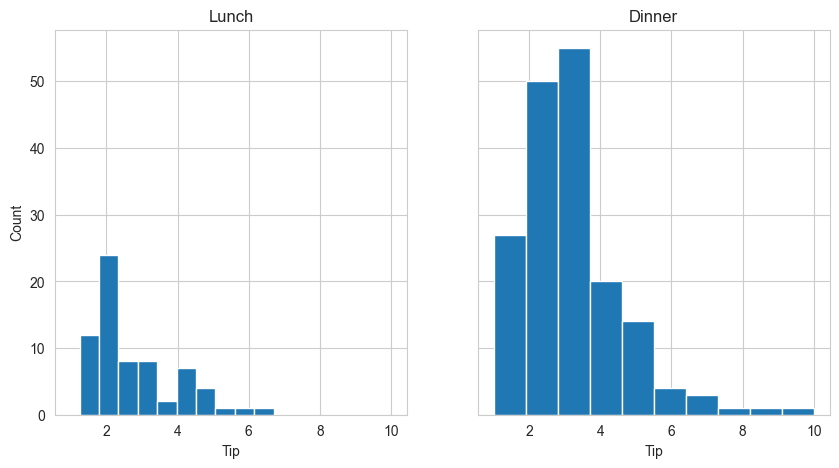

In [10]:
# Create two subplots, one for lunch and one for dinner
fig, axs = plt.subplots(ncols=2, figsize=(10, 5), sharey=True, sharex=True)

# Set the title for each subplot
axs[0].set_title('Lunch')
axs[1].set_title('Dinner')

# Plot a histogram of tip amounts for each subplot
for i, time in enumerate(['Lunch', 'Dinner']):
    data = tips[tips['time'] == time]
    axs[i].hist(data['tip'], bins=10)
    axs[i].set_xlabel('Tip')

# make sure to add it to only one axes
axs[0].set_ylabel('Count')

plt.show()


4. **lacking pandas integration**

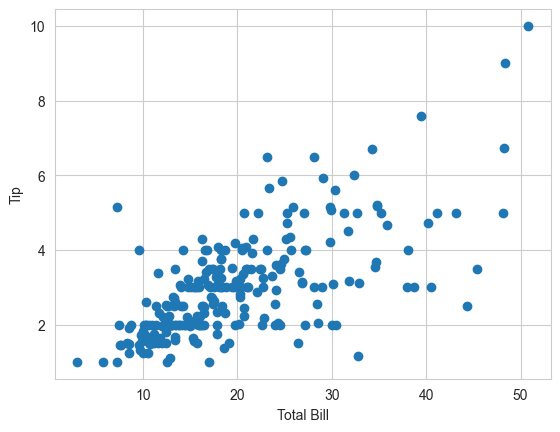

In [11]:
# Extract the relevant columns as NumPy arrays
total_bill = tips["total_bill"].values
tip = tips["tip"].values

# Plot the relationship between total bill and tip using matplotlib
import matplotlib.pyplot as plt
plt.scatter(total_bill, tip)
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()


## Tradeoffs in Visualization
Let's say you want to visualize the distribution of age in a population. Let's consider two options of doing this: a histogram or a box plot.

Consider the two options of visualizing the distribution of age in a population, a histogram or a box plot. Write a short paragraph discussing the tradeoffs between the two options, including when one might be preferred over the other. Then, modify the code below to create both a histogram and a box plot of the distribution of age in a population using the ages data provided, and label each plot appropriately

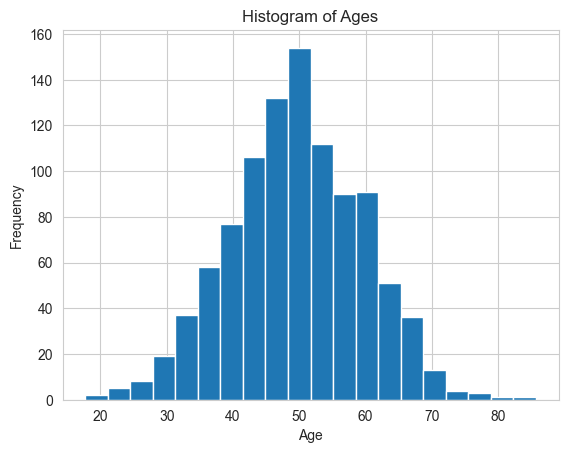

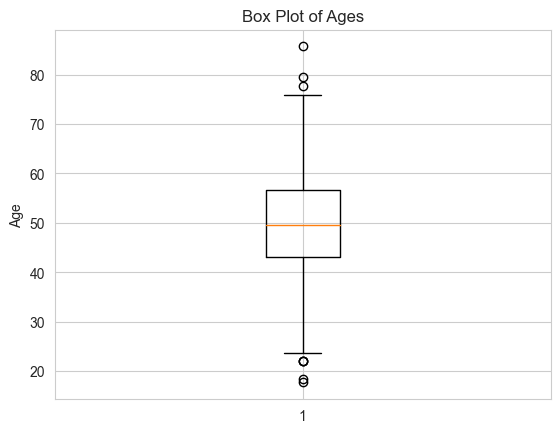

In [12]:
np.random.seed(123)
ages = np.random.normal(50, 10, 1000)

### BEGIN SOLUTION
# create a histogram
plt.hist(ages, bins=20)
plt.title("Histogram of Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# create a box plot
plt.boxplot(ages)
plt.title("Box Plot of Ages")
plt.ylabel("Age")
plt.show()
### END SOLUTION


Write down your insights

The histogram will give you a sense of the shape of the distribution, and you can easily see things like the mode and the presence of outliers. However, it can be difficult to compare histograms of different groups because they may have different bin sizes or ranges.

On the other hand, the box plot can show you the median, quartiles, and outliers, and it's easy to compare multiple box plots side by side. However, it doesn't give you as much information about the shape of the distribution.

So, the trade-off here is between the level of detail and the ease of comparison. If you want to see the shape of the distribution and don't need to compare across groups, the histogram is a good choice. If you want to compare across groups and don't need as much detail about the shape of the distribution, the box plot is a good choice.

Of course, there are many other factors to consider when choosing a visualization, such as the type of data, the audience, and the message you want to convey. The important thing is to think carefully about your goals and the strengths and weaknesses of each type of visualization before making a choice.

So, which one should you use? It depends on your goals and the message you want to convey. If you want to compare the distribution of ages across different groups, such as gender or location, a box plot might be a good choice. On the other hand, if you want to see the shape of the distribution and identify potential outliers or interesting features, a histogram might be a better choice.

## Encodings:

We learnt that:
An encoding is a mapping from a
variable to a visual element.
For instance, length can visually encode
a numerical quantity (here, the number
of cartons)

Consider the sample sales dataset provided, which includes the total revenue generated by four different products. Write a short paragraph describing the encoding used in the code below to visualize this data. Then, modify the code to add a horizontal line representing the average revenue across all products, and label it appropriately.

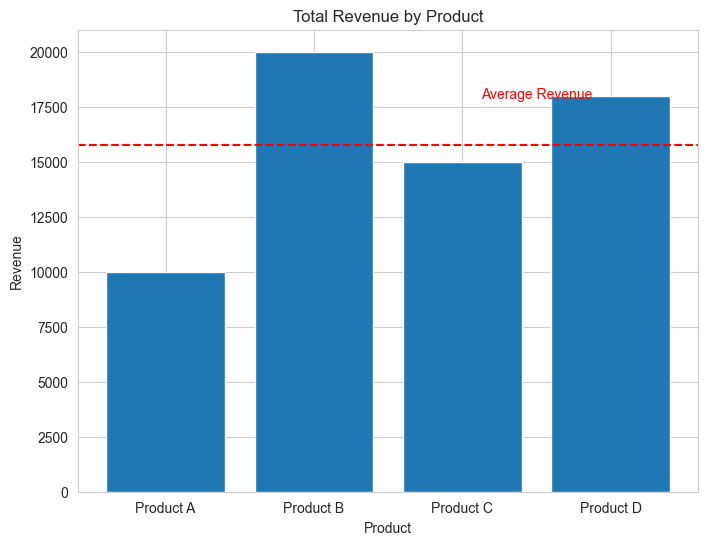

In [13]:
# Create a sample sales dataset
data = {
    "Product": ["Product A", "Product B", "Product C", "Product D"],
    "Revenue": [10000, 20000, 15000, 18000]
}
sales_df = pd.DataFrame(data)

## BEGIN SOLUTION
# Calculate the average revenue across all products
avg_revenue = sales_df["Revenue"].mean()

# Create a bar chart to visualize the revenue by product
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(sales_df["Product"], sales_df["Revenue"])

# Add chart labels and title
ax.set_xlabel("Product")
ax.set_ylabel("Revenue")
ax.set_title("Total Revenue by Product")

# Add a horizontal line representing the average revenue
ax.axhline(avg_revenue, color='red', linestyle='--')
ax.text(2.5, avg_revenue + 2000, "Average Revenue", ha='center', va='bottom', color='red')

### END SOLUTION
# Display the chart
plt.show()


In this example, the Product variable is mapped to the visual element of a bar, and the Revenue variable is visually encoded as the length of the bar. The longer the bar, the higher the revenue generated by the corresponding product.  It also includes a horizontal line encoding a statistic of the dataset; the average revenue across all products, labeled "Average Revenue" and colored red with a dashed line style.

Create a scatter plot that encodes the petal length (x), petal width (y), sepal width (color) and species (marker) of each iris flower in the dataset. However, one of the encodings is missing a legend describing it. Identify the encoding that is missing a legend, and modify the code to add an appropriate legend to the plot.

/tmp/ipykernel_5724/1464485120.py:26: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


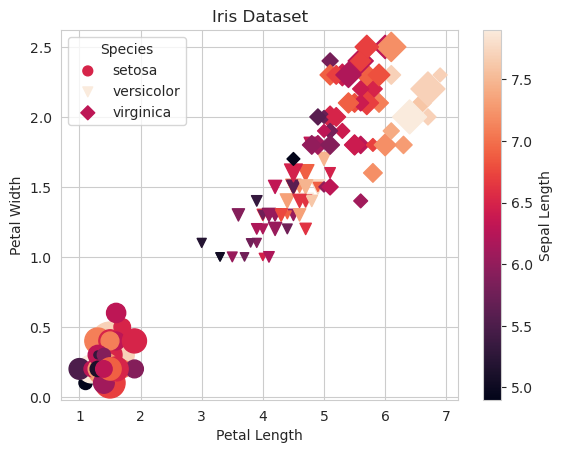

In [65]:
# Convert the 'species' column to a categorical dtype
iris['species'] = iris['species'].astype('category')

# Encode variables as visual elements
x = iris['petal_length']
y = iris['petal_width']
size = np.exp(iris['sepal_width'] * 1.5)
color = iris['sepal_length']

markers = {
    'setosa': 'o',
    'versicolor': 'v',
    'virginica': 'D'
}

# Create scatter plot
fig, ax = plt.subplots()
for species in iris['species'].unique():
    ix = iris['species'] == species
    scatter = ax.scatter(x[ix], y[ix], s=size[ix], c=color[ix], marker=markers[species],
                         label=species)


# Add legend
legend = plt.legend(title='Species', loc='upper left')
for handle in legend.legendHandles:
    handle.set_sizes([50])

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.ax.set_ylabel('Sepal Length')

# Set axis labels and title
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_title('Iris Dataset')

plt.show()


Which of the encodings is missing does not have legend describing it?

The size is not explicitly reported here.

Visualize the distribution of sepal length and sepal width for the iris dataset using Seaborn.

To solve this task, we need to load the iris dataset, extract the sepal length and sepal width data, and create a plot using Seaborn that displays the distribution of these variables. Specifically, we will create a figure with four subplots, where the top left and top right subplots show the probability density function (PDF) for sepal width and sepal length, respectively, and the bottom left and bottom right subplots show the cumulative density function (CDF) for sepal width and sepal length, respectively. We will also add a rugplot for each variable to show the location of each data point along the x-axis.

Here are the necessary code blocks:

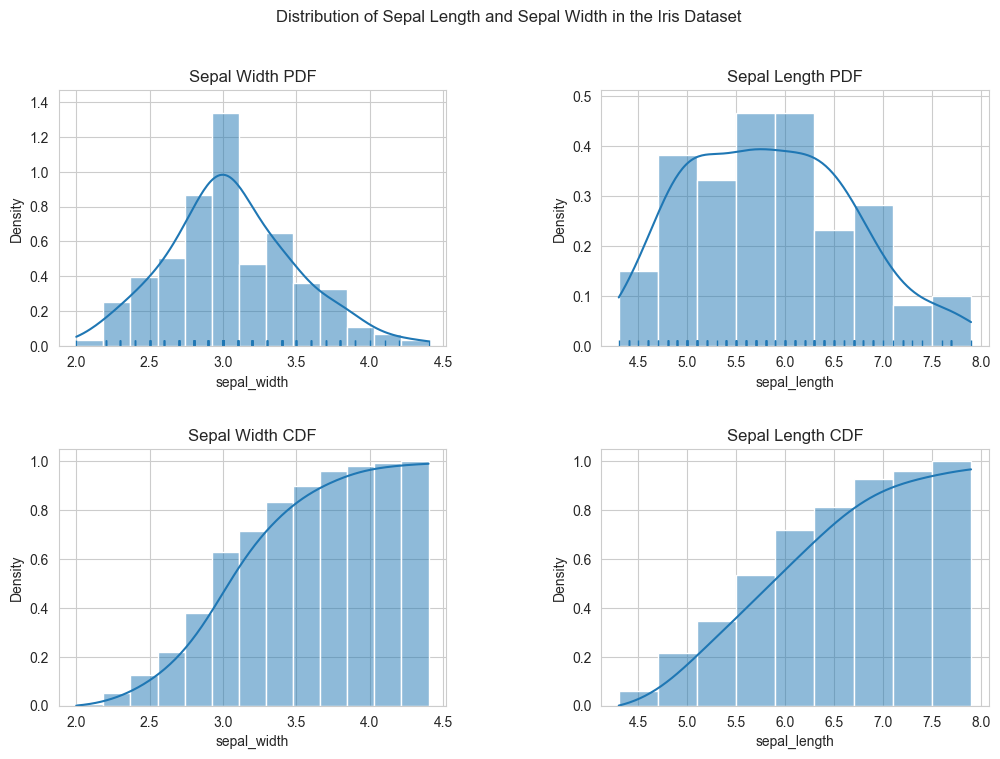

In [16]:
# Define variables
sepal_length = iris['sepal_length']
sepal_width = iris['sepal_width']


# Set up figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Notice, that we can index axes as a 2D array

# Plot sepal length PDF and rugplot
### BEGIN SOLUTION
sns.histplot(sepal_length, kde=True, ax=axes[0, 1], stat='density')
sns.rugplot(sepal_length, ax=axes[0, 1])
axes[0, 1].set_title('Sepal Length PDF')
### END SOLUTION

# Plot sepal width PDF and rugplot
### BEGIN SOLUTION
sns.histplot(sepal_width, kde=True, ax=axes[0, 0], stat='density')
sns.rugplot(sepal_width, ax=axes[0, 0])
axes[0, 0].set_title('Sepal Width PDF')
### END SOLUTION

# Plot sepal width CDF and rugplot
### BEGIN SOLUTION
sns.histplot(sepal_width, kde=True, ax=axes[1, 0], cumulative=True, stat='density')
axes[1, 0].set_title('Sepal Width CDF')
### END SOLUTION

# Plot sepal length CDF and rugplot
### BEGIN SOLUTION
sns.histplot(sepal_length, kde=True, ax=axes[1, 1], cumulative=True, stat='density')
axes[1, 1].set_title('Sepal Length CDF')
### END SOLUTION

# Set global title
plt.suptitle('Distribution of Sepal Length and Sepal Width in the Iris Dataset')

# Show plot
plt.show()


What are the issues and benefits of the respective plots above?

The rugplot allows us to visualize the actual data points, but it can hide the frequency information when the data is quasi-continuous rather than truly continuous.

On the other hand, the CDF plot is a useful way to visualize the distribution of the data and extract quantiles easily, but it may not be as intuitive in showing the shape of the distribution compared to other plots. Nonetheless, it provides a rich representation of the probability density function.

## Binning in Histograms
You have been given a dataset containing information about restaurant tips, including the total bill and the amount of tip. Your task is to create three histograms using sns.histplot that visualize the distribution of total bills in the dataset, each with a different number of bins. Use the default binning method in the first histogram and adjust the number of bins to 10 and 50 in the second and third histograms, respectively. Also add kde=True.  Add appropriate labels to the axes and titles.



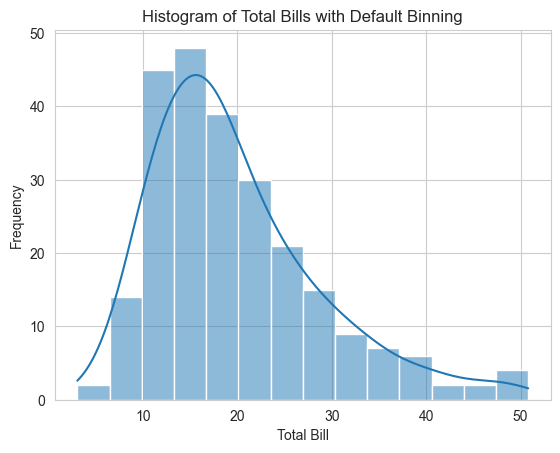

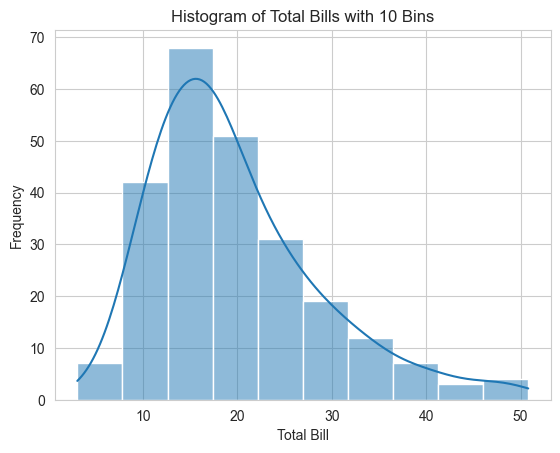

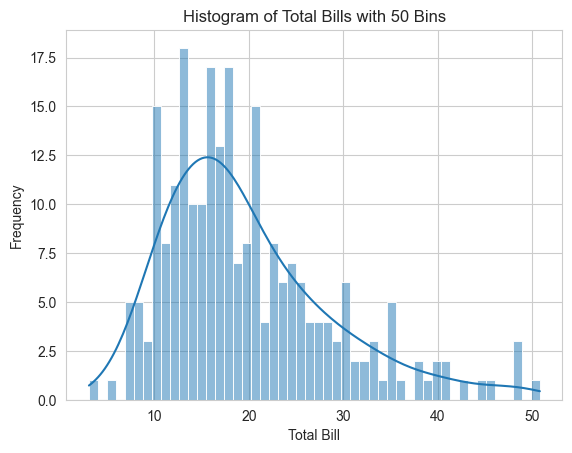

In [18]:
# Plot the histogram with the default binning
### BEGIN SOLUTION
sns.histplot(tips["total_bill"], kde=True)
plt.title("Histogram of Total Bills with Default Binning")
plt.xlabel("Total Bill")
plt.ylabel("Frequency")
### END SOLUTION
plt.show()


# Plot the histogram with 10 bins
### BEGIN SOLUTION
sns.histplot(tips["total_bill"], kde=True, bins=10)
plt.title("Histogram of Total Bills with 10 Bins")
plt.xlabel("Total Bill")
plt.ylabel("Frequency")
### END SOLUTION
plt.show()


# Plot the histogram with 50 bins
### BEGIN SOLUTION
sns.histplot(tips["total_bill"], kde=True, bins=50)
plt.title("Histogram of Total Bills with 50 Bins")
plt.xlabel("Total Bill")
plt.ylabel("Frequency")
### END SOLUTION
plt.show()



This code produces three histograms of the "total_bill" column of the "tips" dataset, each with a different number of bins. The default binning method used by seaborn is the Freedman-Diaconis rule, which takes into account the sample size and the variability of the data to determine an appropriate bin width.

By changing the number of bins, we can see how the resulting histogram changes. With only 10 bins, the histogram appears somewhat jagged and the distribution seems to be skewed to the left. With 50 bins, the histogram appears much smoother and the distribution seems more symmetrical.

This demonstrates the potential for the choice of binning to influence the interpretation of a histogram. In some cases, a smaller number of bins may obscure important features of the data, while a larger number of bins may highlight noise or lead to overfitting.

Remember the example of shifted and scaled histograms from the lecture? Can you recreate such a plot?
![recreate](recreate.png "Shifted histograms")

Instructions:

1. Generate two sets of random data using the numpy.random.normal() function.
2. Create a figure with 2 rows and 2 columns using plt.subplots().
3. In the first row, create two overlapping histograms of the two datasets, one histogram for each dataset.
4. In the second row, create two overlapping CDFs of the two datasets, one CDF for each dataset.
5. In the second column of the figure, create a histogram of the first dataset, and another histogram of the same dataset that has been scaled by a factor of 2.
6. In the second column of the figure, create two overlapping CDFs of the first dataset, one CDF for the original dataset and another CDF for the dataset that has been scaled by a factor of 2.
7. Label the x- and y-axes and give each subplot a descriptive title.
8. Adjust the space between subplots using plt.subplots_adjust().
9. Show the figure using plt.show().

Note: You should use the seaborn and scipy.stats libraries for this task.


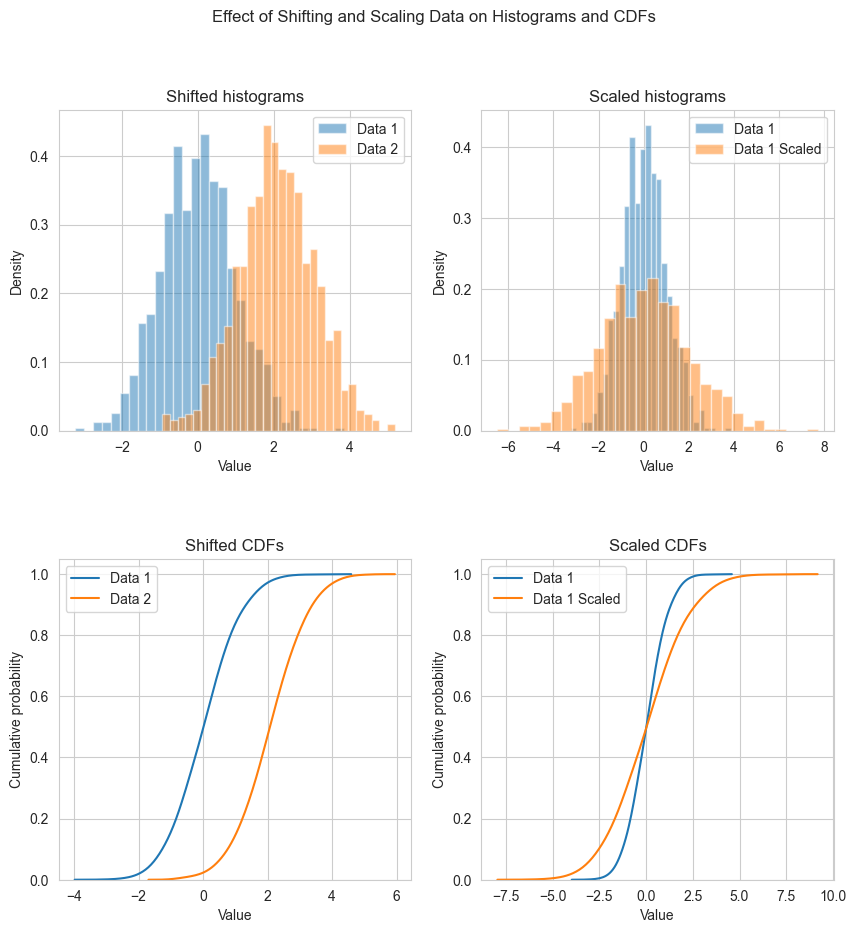

In [21]:
def generate_random_data():
    np.random.seed(42)
    data1 = np.random.normal(0, 1, size=1000)
    data2 = np.random.normal(2, 1, size=1000)
    return data1, data2


def create_shifted_histograms(data1, data2, ax):
    ax.hist(data1, bins=30, alpha=0.5, density=True, label='Data 1')
    ax.hist(data2, bins=30, alpha=0.5, density=True, label='Data 2')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.set_title('Shifted histograms')
    ax.legend()

def create_shifted_cdfs(data1, data2, ax):
    sns.kdeplot(data1, cumulative=True, label='Data 1', ax=ax)
    sns.kdeplot(data2, cumulative=True, label='Data 2', ax=ax)
    ax.set_xlabel('Value')
    ax.set_ylabel('Cumulative probability')
    ax.set_title('Shifted CDFs')
    ax.legend()

def create_scaled_histograms(data1, ax):
    ax.hist(data1, bins=30, alpha=0.5, density=True, label='Data 1')
    ax.hist(2 * data1, bins=30, alpha=0.5, density=True, label='Data 1 Scaled')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.set_title('Scaled histograms')
    ax.legend()

def create_scaled_cdfs(data1, ax):
    sns.kdeplot(data1, cumulative=True, label='Data 1', ax=ax)
    sns.kdeplot(2 * data1, cumulative=True, label='Data 1 Scaled', ax=ax)  # this is actually the scaled one
    # (the solution was right here all along) look at the x- & y-axis in the plots to convince yourselves.
    ax.set_xlabel('Value')
    ax.set_ylabel('Cumulative probability')
    ax.set_title('Scaled CDFs')
    ax.legend()

# Step 1: Generate random data
data1, data2 = generate_random_data()

# Step 2: Create a figure with 2 rows and 2 columns
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Step 3: Create shifted histograms
create_shifted_histograms(data1, data2, axs[0, 0])

# Step 4: Create shifted CDFs
create_shifted_cdfs(data1, data2, axs[1, 0])

# Step 5: Create scaled histograms
create_scaled_histograms(data1, axs[0, 1])

# Step 6: Create scaled CDFs
create_scaled_cdfs(data1, axs[1, 1])

# Step 7: Add a bit of space between subplots and label axes and titles
plt.subplots_adjust(hspace=0.4)
fig.suptitle('Effect of Shifting and Scaling Data on Histograms and CDFs')

# Step 8: Show the figure
plt.show()


## Boxplots and Violin Plots
Use the following data to create two subplots, the first one with a boxplot and the second one with a violin plot. What do you notice?

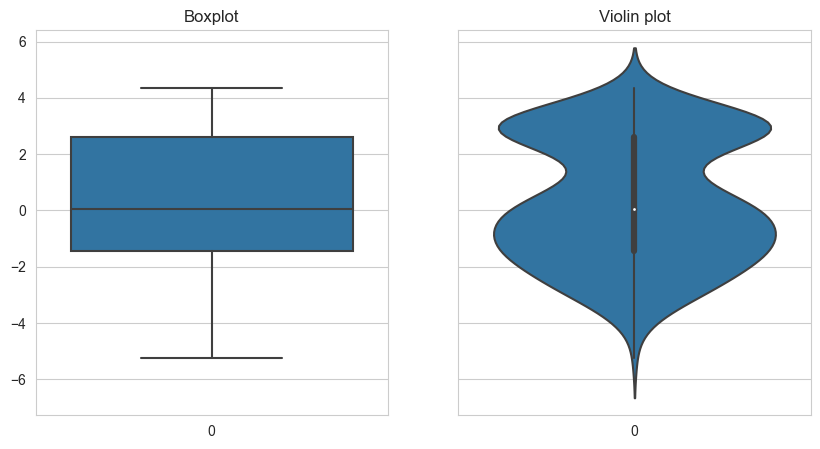

In [25]:
np.random.seed(42)
data = np.concatenate([np.random.normal(0, 1, size=100),
                       np.random.normal(3, 0.5, size=100),
                       np.random.normal(-2, 1, size=100)])

# Create subplots for boxplot and violin plot
fig, axs = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)

### BEGIN SOLUTION
# Boxplot
sns.boxplot(data=data, ax=axs[0])

# Violin plot
sns.violinplot(data=data, ax=axs[1], inner='box') # notice that we can plot a boxplot directly inside here

### END SOLUTION
axs[1].set_title('Violin plot')
axs[0].set_title('Boxplot')
plt.show()


In this example, we create an array of data that contains three normal distributions with different means and variances. When we plot this data using a boxplot, the plot only shows a single box and whiskers plot, which doesn't capture the fact that the data is multi-modal. However, when we plot the same data using a violin plot, we can clearly see the multiple peaks in the distribution, which indicates that the data is multi-modal.

# Transformation

Let us investigate the mpg (miles per gallon) dataset from the seaborn library. The dataset contains information about the fuel efficiency of cars from the 1970s and 1980s. The dataset contains the following columns:


In [28]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

Let's have a look at the dependent variable (mile per gallon) and try to solely explain it by the weight of the car. We can use a scatter plot to visualize the relationship between the two variables. We can also fit a linear regression model to the data and plot the regression line on top of the scatter plot.

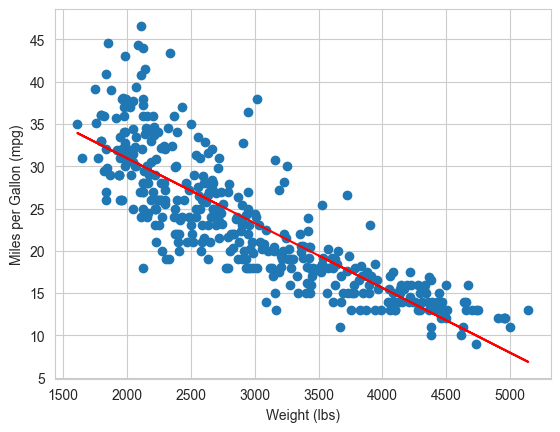

In [32]:
from sklearn.linear_model import LinearRegression


# Create a scatter plot of miles per gallon (mpg) versus weight
plt.scatter(mpg["weight"], mpg["mpg"])

# Fit a linear regression model to the data
model = LinearRegression().fit(mpg[["weight"]], mpg["mpg"])
intercept = model.intercept_
slope = model.coef_[0]

# Add the regression line to the plot
plt.plot(mpg["weight"], intercept + slope * mpg["weight"], color="red")

plt.xlabel("Weight (lbs)")
plt.ylabel("Miles per Gallon (mpg)")
plt.show()


let us transform the weight variable using the natural logarithm. We can then again fit a linear regression model to the transformed data and plot the regression line on top of the scatter plot. Does this look better as a fit for the data?

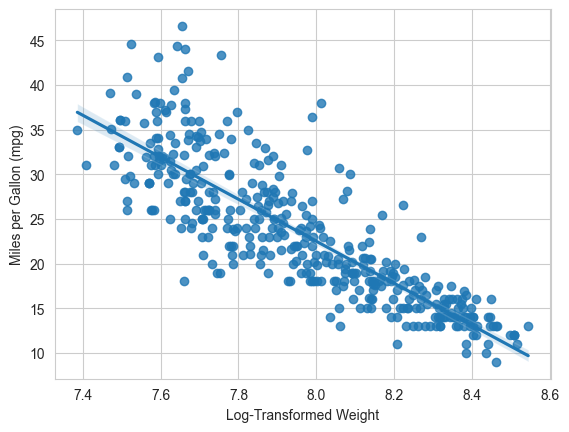

In [33]:
# Transform the weight variable using natural logarithm
### BEGIN SOLUTION
mpg["log_weight"] = np.log(mpg["weight"])

# Create a scatter plot of miles per gallon (mpg) versus the transformed weight
sns.regplot(x="log_weight", y="mpg", data=mpg)
plt.xlabel("Log-Transformed Weight")
### END SOLUTION
plt.ylabel("Miles per Gallon (mpg)")
plt.show()


Given that the transformed version looks nice, in terms of its fit, we could also look at what the prediction looks like after inverting the transformation:

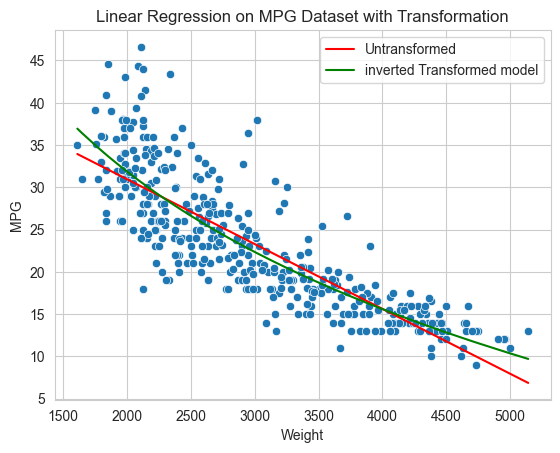

In [34]:
# Define the x and y variables
x = mpg['weight']
y = mpg['mpg']

# Fit a linear regression to the untransformed data
m_untransformed, b_untransformed = np.polyfit(x, y, 1)
regline_untransformed = m_untransformed * x + b_untransformed

# Apply a suitable transformation to the x variable
### BEGIN SOLUTION
x_transformed = np.log(x)
### END SOLUTION


# Fit a linear regression to the transformed data
### BEGIN SOLUTION
m_transformed, b_transformed = np.polyfit(x_transformed, y, 1)
regline_transformed = m_transformed * x_transformed + b_transformed
### END SOLUTION

# Plot the data and regression lines
fig, ax = plt.subplots()
sns.scatterplot(x=x, y=y, ax=ax)
sns.lineplot(x=x, y=regline_untransformed, color='r', ax=ax, label='Untransformed')
sns.lineplot(x=x, y=regline_transformed, color='g', ax=ax, label='inverted Transformed model')

# Invert the transformation of the predicted regression line
### BEGIN SOLUTION
x_vals = np.linspace(min(x), max(x), 100)
y_vals_transformed = m_transformed * np.log(x_vals) + b_transformed # some regression magic :) make sure to revisit this once we learn about regression properly.
y_vals_untransformed = np.exp(y_vals_transformed)
### END SOLUTION

# Add legend and labels
ax.legend()
ax.set_xlabel('Weight')
ax.set_ylabel('MPG')
ax.set_title('Linear Regression on MPG Dataset with Transformation')

plt.show()


Is this still a linear relationship? What do you think?


No, this is no longer a linear relationship.
It is a log-linear relationship!
i.e. we have a relationship, that is log(y) = m*x +b
